In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [4]:
df=df.dropna()

In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# ANN implementation

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [13]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history = NN_model.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
35/35 [==============================] - 13s 17ms/step - loss: 77.1747 - mean_absolute_error: 77.1747 

Epoch 44/100
35/35 [==============================] - 0s 3ms/step - loss: 40.0771 - mean_absolute_error: 40.0771 - val_loss: 39.0003 - val_mean_absolute_error: 39.0003
Epoch 45/100
35/35 [==============================] - 0s 3ms/step - loss: 38.3288 - mean_absolute_error: 38.3288 - val_loss: 39.1802 - val_mean_absolute_error: 39.1802
Epoch 46/100
35/35 [==============================] - 0s 2ms/step - loss: 38.2175 - mean_absolute_error: 38.2175 - val_loss: 39.5887 - val_mean_absolute_error: 39.5887
Epoch 47/100
35/35 [==============================] - 0s 2ms/step - loss: 42.4523 - mean_absolute_error: 42.4523 - val_loss: 43.5979 - val_mean_absolute_error: 43.5979
Epoch 48/100
35/35 [==============================] - 0s 2ms/step - loss: 39.1366 - mean_absolute_error: 39.1366 - val_loss: 39.6987 - val_mean_absolute_error: 39.6987
Epoch 49/100
35/35 [==============================] - 0s 2ms/step - loss: 35.5481 - mean_absolute_error: 35.5481 - val_loss: 43.1028 - val_mean_absolute_error: 

Epoch 93/100
35/35 [==============================] - 0s 3ms/step - loss: 41.3021 - mean_absolute_error: 41.3021 - val_loss: 48.7171 - val_mean_absolute_error: 48.7171
Epoch 94/100
35/35 [==============================] - 0s 3ms/step - loss: 41.5090 - mean_absolute_error: 41.5090 - val_loss: 43.3957 - val_mean_absolute_error: 43.3957
Epoch 95/100
35/35 [==============================] - 0s 3ms/step - loss: 40.3424 - mean_absolute_error: 40.3424 - val_loss: 42.4635 - val_mean_absolute_error: 42.4635
Epoch 96/100
35/35 [==============================] - 0s 3ms/step - loss: 37.6388 - mean_absolute_error: 37.6388 - val_loss: 40.9790 - val_mean_absolute_error: 40.9790
Epoch 97/100
35/35 [==============================] - 0s 3ms/step - loss: 36.6705 - mean_absolute_error: 36.6705 - val_loss: 38.4406 - val_mean_absolute_error: 38.4406
Epoch 98/100
35/35 [==============================] - 0s 3ms/step - loss: 35.3718 - mean_absolute_error: 35.3718 - val_loss: 38.6241 - val_mean_absolute_error: 

In [14]:
#NN_model.fit?

In [16]:
prediction = NN_model.predict(x_test)

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.00135241469292
MSE: 3451.538289291088
RMSE: 58.74979395105218


# KNN implementation

In [18]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [19]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv=5)
score.mean()

-0.12260548546487755

In [20]:
prediction = regressor.predict(x_test)

In [21]:
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, x, y, cv=10, scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

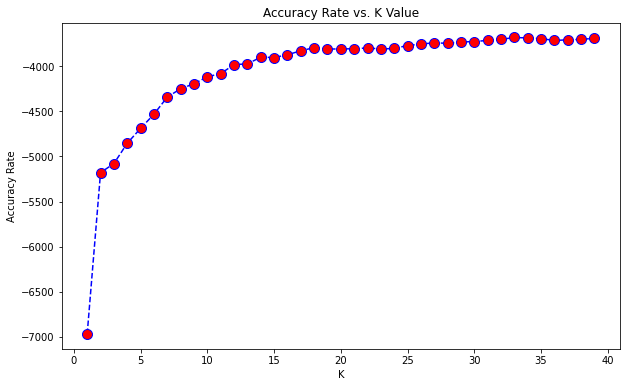

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 57.635540334855406
MSE: 7053.356899257989
RMSE: 83.98426578388353
